In [16]:
from lvmtipo.actors import lvm
from cluplus.proxy import invoke

from lvmagp.images import Image
from plotimg import plot_images

In [17]:
await invoke(lvm.sci.agc.start(), lvm.skyw.agc.start(), lvm.skye.agc.start(), lvm.spec.agc.start())
await invoke(lvm.sci.agc.status(), lvm.skyw.agc.status(), lvm.skye.agc.status(), lvm.spec.agc.status())

[{'east': {'temperature': 46.625,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'},
  'center': {'temperature': 48.75,
   'cooler': nan,
   'binning': [1, 1],
   'area': [3208, 2200],
   'state': 'online'}},
 {'east': {'temperature': 45.125,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'},
  'west': {'temperature': 45.625,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}},
 {'east': {'temperature': 45.75,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'},
  'west': {'temperature': 42.5,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}},
 {'east': {'temperature': 43.125,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}}]

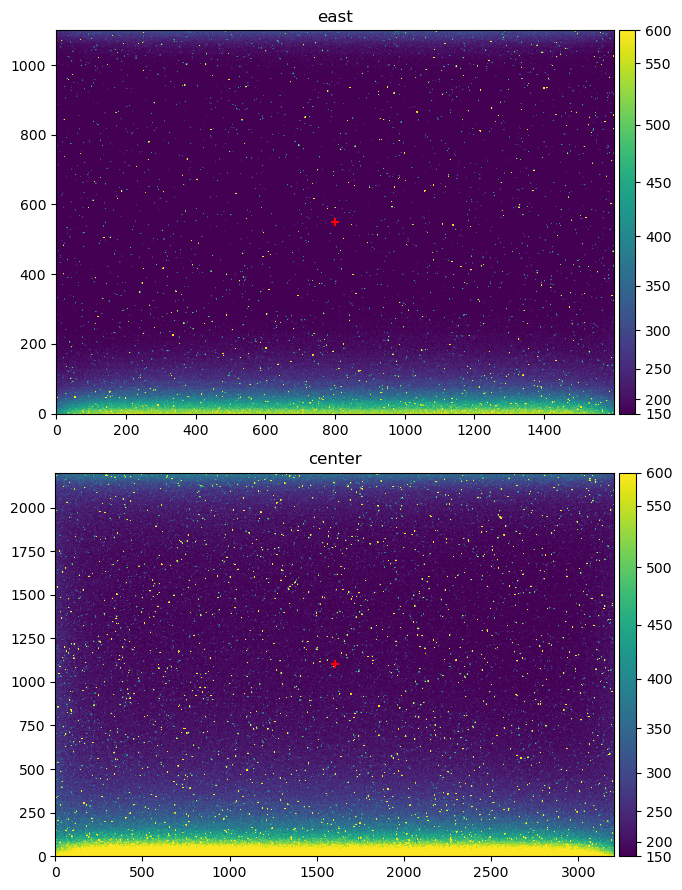

CancelledError: 

In [18]:
%matplotlib inline 

import asyncio

from cluplus.proxy import invoke

from lvmtipo.actors import lvm
from lvmagp.images import Image
from plotimg import plot_images

from IPython.display import clear_output

await lvm.sci.foc.start()
await lvm.sci.foc.status()
await lvm.sci.pwi.start()
await lvm.sci.pwi.setConnected(True, statusTick=1.0)

await lvm.sci.pwi.status()

await lvm.sci.agc.start()

exptime = 10

while True:
    rc = await lvm.sci.agc.expose( exptime)
    filenames = rc.flatten().unpack("*.filename")
    print(filenames)
    clear_output()
    images = [Image.from_file(f) for f in filenames]
    plot_images(images)
    print()